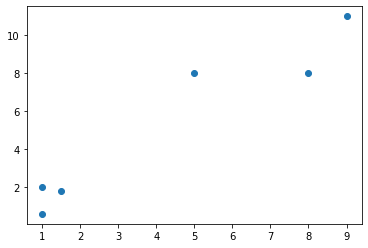

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 训练数据
x = np.array([ [1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11] ])
plt.scatter(x[:,0],x[:,1])
plt.show()
# 预测数据
predict = [[2,1], [6,9]]

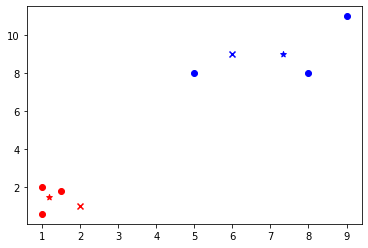

In [25]:
# sklearn 下的KMeans
kmeans = KMeans(2)
kmeans.fit(x)
centers=kmeans.cluster_centers_
labels=kmeans.labels_
preLabels=kmeans.predict(predict)
for i in range(len(x)):
    plt.scatter(x[i][0],x[i][1],c=('r' if labels[i]==0 else 'b'))
plt.scatter(centers[0][0],centers[0][1],marker='*',c='r')
plt.scatter(centers[1][0],centers[1][1],marker='*',c='b')
for i in range(len(preLabels)):
     plt.scatter(predict[i][0],predict[i][1],marker='x',c=('r' if preLabels[i]==0 else 'b'))
    
plt.show()

In [104]:
# 实现自己的Kmean算法
import numpy as np

class KMeans:
    # k组数，min_error 上次和和最初的中心点最小误差,max_iter迭代次数
    def __init__(self,k,min_error=0.0001,max_iter=200):
        self.k=k
        self.min_error=min_error
        self.max_iter=max_iter
        #训练
    def fit(self,trainX):
        self.centers={}
        
            
        
        # 获取训练集前k个点做初始中心点
        for i in range(self.k):
            self.centers[i]=trainX[i]
        # 计算各个点到中心点的欧式距离，并归类到最近的中心点，超过最大迭代次数停止
        for i in range(self.max_iter):
            self.clf = {}
            for i in range(self.k):
                self.clf[i]=[]
           
                
            for x in trainX:
                distance=[]
                for center_i in self.centers:
                    distance.append(np.sqrt(np.linalg.norm(x - self.centers[center_i])))
                    
                classification = distance.index(min(distance))               
                self.clf[classification].append(x)
            pre_centers=self.centers
            for c in self.clf:
                self.centers[c] = np.average(self.clf[c], axis=0)
               # '中心点'是否在误差范围
            optimized = True
            for center in self.centers:
                org_centers = pre_centers[center]
                cur_centers = self.centers[center]
             
                if np.sum((cur_centers - org_centers) / org_centers * 100.0) > self.min_error:
                    optimized = False    
#             if optimized:
#                 break;
                
        print(self.centers)    
    # 预测
    def predict(self,testX):
        
        pass

In [105]:
kmeans=KMeans(2)
kmeans.fit(x)

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


In [26]:
# -*- coding:utf-8 -*-



之前 {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
现在 {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


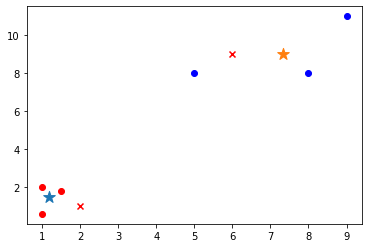

In [82]:
import numpy as np
from matplotlib import pyplot


class K_Means(object):
    # k是分组数；tolerance‘中心点误差’；max_iter是迭代次数
    def __init__(self, k=2, tolerance=0.0001, max_iter=300):
        self.k_ = k
        self.tolerance_ = tolerance
        self.max_iter_ = max_iter

    def fit(self, data):
        self.centers_ = {}
        for i in range(self.k_):
            self.centers_[i] = data[i]

        for i in range(self.max_iter_):
            self.clf_ = {}
            
            for i in range(self.k_):
                self.clf_[i] = []
            # print("质点:",self.centers_)
            for feature in data:
                # distances = [np.linalg.norm(feature-self.centers[center]) for center in self.centers]
                distances = []
                for center in self.centers_:
                    # 欧拉距离
                    # np.sqrt(np.sum((features-self.centers_[center])**2))
                    distances.append(np.linalg.norm(feature - self.centers_[center]))
                classification = distances.index(min(distances))
                self.clf_[classification].append(feature)

            # print("分组情况:",self.clf_)
            prev_centers = dict(self.centers_)
            for c in self.clf_:
                self.centers_[c] = np.average(self.clf_[c], axis=0)

            # '中心点'是否在误差范围
            optimized = True
            for center in self.centers_:
                org_centers = prev_centers[center]
                cur_centers = self.centers_[center]
               
                if np.sum((cur_centers - org_centers) / org_centers * 100.0) > self.tolerance_:
                    optimized = False
            if optimized:
                print("之前",prev_centers)
                print("现在",self.centers_)
                
                break

    def predict(self, p_data):
        distances = [np.linalg.norm(p_data - self.centers_[center]) for center in self.centers_]
        index = distances.index(min(distances))
        return index


if __name__ == '__main__':
    x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
    k_means = K_Means(k=2)
    k_means.fit(x)
    print(k_means.centers_)
    for center in k_means.centers_:
        pyplot.scatter(k_means.centers_[center][0], k_means.centers_[center][1], marker='*', s=150)

    for cat in k_means.clf_:
        for point in k_means.clf_[cat]:
            pyplot.scatter(point[0], point[1], c=('r' if cat == 0 else 'b'))

    predict = [[2, 1], [6, 9]]
    for feature in predict:
        cat = k_means.predict(predict)
        pyplot.scatter(feature[0], feature[1], c=('r' if cat == 0 else 'b'), marker='x')

    pyplot.show()

5